In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


### Load dataset

In [12]:
# Path variables 
strAnnotationPath = '../data/dataCOCO/export/_annotations.coco.json'
strImagePath = '../data/dataCOCO/export'

In [24]:
# Load dataset
fullDataset = datasets.CocoDetection(root=strImagePath, annFile=strAnnotationPath, transform=transforms.ToTensor())
fullDataloader = torch.utils.data.DataLoader(fullDataset, batch_size=32, shuffle=False, num_workers=0)

loading annotations into memory...
Done (t=2.26s)
creating index...
index created!


### Information about the dataset

In [19]:
# Print all classes
print('Classes: ')
print('Number of classes: ', len(fullDataset.coco.cats))
for cat in fullDataset.coco.cats:
    print(cat, ': ', fullDataset.coco.cats[cat]['name'])

Classes: 
Number of classes:  12
0 :  obstacles
1 :  biker
2 :  car
3 :  pedestrian
4 :  trafficLight
5 :  trafficLight-Green
6 :  trafficLight-GreenLeft
7 :  trafficLight-Red
8 :  trafficLight-RedLeft
9 :  trafficLight-Yellow
10 :  trafficLight-YellowLeft
11 :  truck


In [41]:
fullDataset

Dataset CocoDetection
    Number of datapoints: 29800
    Root location: ../data/dataCOCO/export
    StandardTransform
Transform: ToTensor()

In [ ]:
# Iterate over the whole dataset
def countSamplesPerClass(dataset):
    numClasses = len(dataset.coco.cats)
    sample_count = np.zeros(numClasses)

    for imgId in dataset.coco.getImgIds():
        annIds = dataset.coco.getAnnIds(imgIds=imgId)
        annotations = dataset.coco.loadAnns(annIds)
        for annotation in annotations:
            classId = annotation['category_id']
            sample_count[classId] += 1

    return sample_count

In [66]:
class_counts = {}

for target in fullDataset.coco.dataset['annotations']:
    print(target)
    class_id = target['category_id']
    
    if class_id in class_counts:
        class_counts[class_id] += 1
    else:
        class_counts[class_id] = 1
    
    break

print(class_counts)


{2: 127873, 3: 21491, 7: 13673, 8: 3482, 5: 10838, 11: 7194, 1: 3704, 6: 614, 4: 5101, 9: 541, 10: 28}


In [39]:
imageCount = countSamplesPerClass(fullDataset)

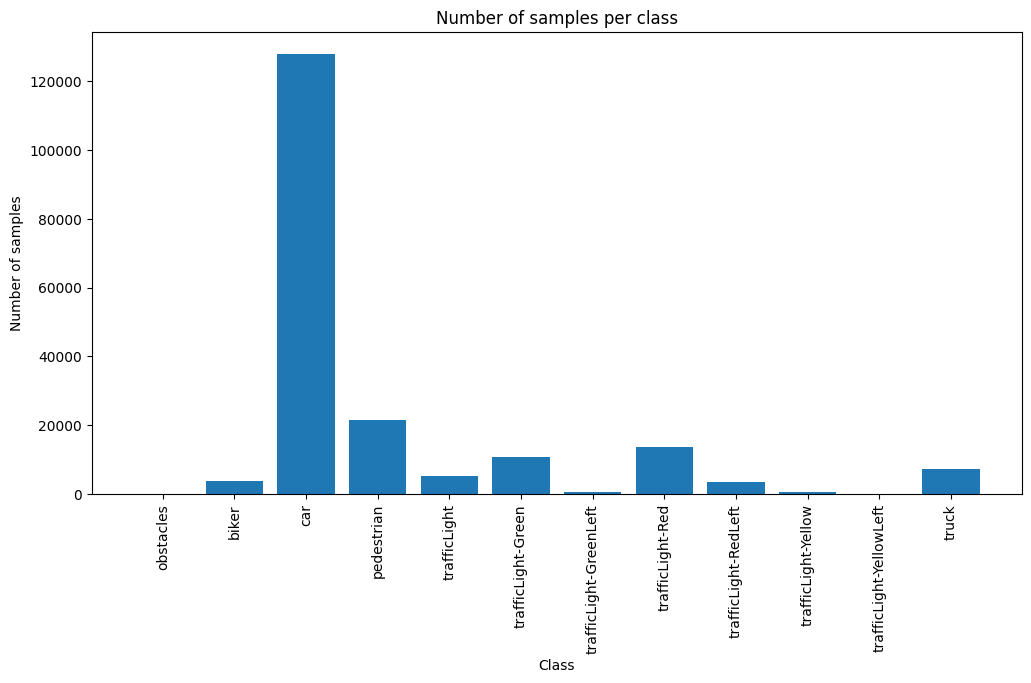

In [40]:
numClasses = len(fullDataset.coco.cats)
classNames = [fullDataset.coco.cats[i]["name"] for i in range(numClasses)]

plt.figure(figsize=(12, 6))
plt.bar(classNames, imageCount)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Informations about the dataset
print('Number of images: ', len(fullDataset.coco.imgs))
print("Height of the image: ", fullDataset[0][0].size()[1])
print("Width of the image: ", fullDataset[0][0].size()[2])

Number of classes:  12
Number of images:  29800
Height of the image:  512
Width of the image:  512


In [ ]:

for image, targe in fullDataloader:
    plt.imshow(image[0].permute(1, 2, 0))
    plt.show()

{'id': 6337, 'image_id': 1000, 'category_id': 2, 'bbox': [1, 237, 34, 83], 'area': 2822, 'segmentation': [], 'iscrowd': 0}
{'id': 6338, 'image_id': 1000, 'category_id': 2, 'bbox': [21, 263, 14, 25.5], 'area': 357, 'segmentation': [], 'iscrowd': 0}
{'id': 6339, 'image_id': 1000, 'category_id': 2, 'bbox': [45, 258, 17.5, 22], 'area': 385, 'segmentation': [], 'iscrowd': 0}
{'id': 6340, 'image_id': 1000, 'category_id': 2, 'bbox': [104, 256, 12.5, 16], 'area': 200, 'segmentation': [], 'iscrowd': 0}
{'id': 6341, 'image_id': 1000, 'category_id': 2, 'bbox': [125, 242, 48, 57], 'area': 2736, 'segmentation': [], 'iscrowd': 0}
{'id': 6342, 'image_id': 1000, 'category_id': 5, 'bbox': [190, 144, 12.5, 42.5], 'area': 531.25, 'segmentation': [], 'iscrowd': 0}
{'id': 6343, 'image_id': 1000, 'category_id': 3, 'bbox': [220, 237, 17.5, 64], 'area': 1120, 'segmentation': [], 'iscrowd': 0}
{'id': 6344, 'image_id': 1000, 'category_id': 3, 'bbox': [313, 236, 18, 71.5], 'area': 1287, 'segmentation': [], 'iscr

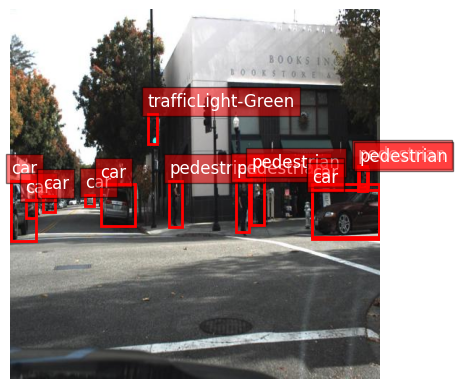

In [63]:
exampleIndex = 1000
image, target = fullDataset[exampleIndex]
imageCopy = transforms.ToPILImage()(image)

fix, ax = plt.subplots(1)
ax.imshow(imageCopy)

annotations = target

for annotation in annotations:
    print(annotation)
    bbox = annotation['bbox']
    classId = annotation['category_id']
    className = fullDataset.coco.cats[classId]['name']

    rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(rect)

    plt.text(bbox[0], bbox[1]-10, s=className, bbox=dict(facecolor='red', alpha=0.5), fontsize=12, color='white')

plt.axis('off')
plt.show()